# Final Project: Covid-19 
## Cleaning and Exploring Data with Pandas
By: Megan Lee, Rebecca Li, Abby Li 

In [190]:
import numpy as np
import pandas as pd 
import seaborn as sns
import datetime

## Introduction

We picked this Covid-19 dataset because we thought it was the most interesting in terms of the news today. 

Initially the questions we wanted to address were: 
<ul> 1. How do certain time periods affected the spread of Covid-19, such as the impact of when the travel ban was enacted, and impact after shelter in place laws in different states (i.e. Did early policy help reduce cases?)</ul>
<ul> 2. Does state population and state density have a significant effect on the spread of confirmed cases?</ul>
<ul> 3. Does the population of females affect the number of cases in each state?</ul>

The rest of this report proceeds to attempt to answer the questions.

## Let's Start by Importing the Data Given. 

In [191]:
states = pd.read_csv('4.18states.csv')
abridgedCounties = pd.read_csv('abridged_couties.csv')
timeConfirmed= pd.read_csv('time_series_covid19_confirmed_US.csv')
timeDeaths = pd.read_csv('time_series_covid19_deaths_US.csv')

## Cleaning the Data 

We will now clean the above data tables to use in our EDA. From class, we learned that we could drop the rows with 0, or fill it with a mean number. We don't want to bias our data by dropping all the NaN values, but we saw that in many cases States had a NaN date value because a policy was not implemented. We will also use one-hot encoding for xxx. 

<b>We cleaned our data based on these 5 values:</b>
<li>Structure -- the “shape” of a data file</li>
<li>Granularity -- how fine/coarse is each datum</li>
<li>Scope -- how (in)complete is the data</li>
<li>Temporality -- how is the data situated in time</li>
<li>Faithfulness</li>

In [192]:
abridgedCounties.head(50)

abridged_clean = abridgedCounties.drop(columns=['lat', 'lon', 'POP_LATITUDE', 'POP_LONGITUDE'])
abridged_clean

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,South,East South Central,2.0,55601.0,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,South,East South Central,3.0,218022.0,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,South,East South Central,6.0,24881.0,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,South,East South Central,1.0,22400.0,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,South,East South Central,1.0,57840.0,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3239,15005,15.0,5.0,Kalawao,HI,NaN,West,Pacific,3.0,88.0,...,737509.0,737507.0,737504.0,737509.0,737500.0,737495.0,0.3162,NaN,NaN,NaN
3240,72039,72.0,39.0,Ciales Municipio,PR,NaN,NaN,NaN,1.0,15918.0,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3241,72069,72.0,69.0,Humacao Municipio,PR,NaN,NaN,NaN,1.0,50532.0,...,NaN,737500.0,737499.0,737499.0,737500.0,737495.0,NaN,NaN,NaN,NaN
3242,City1,NaN,NaN,New York City,NY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [193]:
#convert proleptic Gregorian ordinal of the date to normal, ordinal date. 

dateColumns = ['stay at home', '>50 gatherings', '>500 gatherings', 'entertainment/gym', 
                'public schools', 'foreign travel ban', 'federal guidelines', 'restaurant dine-in']
# fill na values 
abridged_clean[dateColumns] = abridged_clean[dateColumns].fillna(1).astype(int)
abridged_clean[dateColumns] = abridged_clean[dateColumns].applymap(datetime.date.fromordinal) 
abridged_clean[dateColumns] = abridged_clean[dateColumns].astype('str').replace('0001-01-01', 'Not Implemented')

In [194]:
# Fix missing states
stateNameToState = {
    "VA": "Virginia",
    "PR": "Puerto Rico",
    "AK": "Alaska", 
    "HI": "Hawaii",
    "VI": "Virgin Islands",
    "GU": "Guam"
    }

abridged_clean.loc[abridged_clean['StateName'].isin(stateNameToState.keys()), 'State'] = abridged_clean['StateName'].map(stateNameToState)

abridged_clean = abridged_clean[abridged_clean['State'].notna()]

#remove counties w/o data 
emptyCounties = ['Unknown', 'Manua', 'Ofu', 'Olosega', 'Tutuila', 'Rota', 'Saipan', 'Aguijan', 'Tinian']

abridged_clean = abridged_clean[~abridged_clean.CountyName.isin(emptyCounties)]   
abridged_clean.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,CensusRegionName,CensusDivisionName,Rural-UrbanContinuumCode2013,PopulationEstimate2018,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,South,East South Central,2.0,55601.0,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,South,East South Central,3.0,218022.0,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,South,East South Central,6.0,24881.0,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,South,East South Central,1.0,22400.0,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,South,East South Central,1.0,57840.0,...,2020-03-13,2020-03-16,2020-03-19,2020-03-28,2020-03-16,2020-03-11,0.4242,7.21,31850.0,25233.0


In [195]:
# abridged_clean.join(timeConfirmed, on='StateName')
# abridgedCleanDates
# timeConfirmed['Province_State'] 

timeConfirmedUS = timeConfirmed.loc[timeConfirmed['Country_Region'] == 'US']

abridgedCleanDates = abridged_clean[['StateName', 'CountyName', 'State', 'countyFIPS'] + dateColumns]

#cast counties as int 
abridgedCleanDates['countyFIPS'] = abridgedCleanDates['countyFIPS'].astype('int')

#drop NA FIPS values in timeConfirmed
timeConfirmedUS = timeConfirmedUS[timeConfirmedUS['FIPS'].notna()]
timeConfirmedUS['FIPS'] = timeConfirmedUS['FIPS'].astype('int')

#left join abridgedCleanDates and timeConfirmed US
timeConfirmedAndPolicies = pd.merge(abridgedCleanDates, timeConfirmedUS, how='left', left_on='countyFIPS', right_on='FIPS')

#dropped values if we didnt not have data about confirmed cases. 
timeConfirmedAndPolicies = timeConfirmedAndPolicies.dropna()

timeConfirmedAndPolicies.head() 

/srv/conda/envs/data100/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,StateName,CountyName,State,countyFIPS,stay at home,>50 gatherings,>500 gatherings,entertainment/gym,public schools,foreign travel ban,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,AL,Autauga,Alabama,1001,2020-04-04,2020-03-20,2020-03-13,2020-03-28,2020-03-16,2020-03-11,...,15.0,17.0,19.0,19.0,19.0,23.0,24.0,26.0,26.0,25.0
1,AL,Baldwin,Alabama,1003,2020-04-04,2020-03-20,2020-03-13,2020-03-28,2020-03-16,2020-03-11,...,56.0,59.0,66.0,71.0,72.0,87.0,91.0,101.0,103.0,109.0
2,AL,Barbour,Alabama,1005,2020-04-04,2020-03-20,2020-03-13,2020-03-28,2020-03-16,2020-03-11,...,4.0,9.0,9.0,10.0,10.0,11.0,12.0,14.0,15.0,18.0
3,AL,Bibb,Alabama,1007,2020-04-04,2020-03-20,2020-03-13,2020-03-28,2020-03-16,2020-03-11,...,9.0,11.0,13.0,16.0,17.0,17.0,18.0,22.0,24.0,26.0
4,AL,Blount,Alabama,1009,2020-04-04,2020-03-20,2020-03-13,2020-03-28,2020-03-16,2020-03-11,...,11.0,12.0,12.0,13.0,14.0,16.0,17.0,18.0,20.0,20.0


In [196]:
confirmedCasesDates = timeConfirmedAndPolicies.groupby('State').agg(np.sum)

confirmedCasesDates_mean = confirmedCasesDates.agg('mean')
confirmedCasesDates_std = np.std(confirmedCasesDates)

confirmedCasesDates_centered = (confirmedCasesDates - confirmedCasesDates_mean)/confirmedCasesDates_std

u, s, vt = np.linalg.svd(confirmedCasesDates_centered, full_matrices = False)

In [197]:
first_2_pcs = confirmedCasesDates_centered @ vt.T

#select 1st and 2nd pcs 
first_2_pcs = first_2_pcs.reset_index().iloc[:, 1:3]

#rename columns
first_2_pcs.columns = ['pc1', 'pc2']

#jitter slightly since there's overlap
first_2_pcs_jittered = first_2_pcs + np.random.normal(0, 0.1, size = (len(first_2_pcs), 2))

In [198]:
sortData = abridged_clean.groupby('State').agg('sum').sort_values('PopulationEstimate2018', ascending=False)

sortData = sortData[['PopTotalMale2017', 'PopTotalFemale2017']]
sortData['PopTotal2017'] = sortData['PopTotalMale2017'] + sortData['PopTotalFemale2017']
sortData['FemalePercentage2017'] = sortData['PopTotalFemale2017']/sortData['PopTotal2017']

sortData = sortData.sort_values('FemalePercentage2017')

highestFemalePerctangeStates = sortData.index.values[-3:]
lowestFemalePerctangeStates = sortData.index.values[0:3]

[Text(0, 0.5, 'Distance from the Mean'), Text(0.5, 0, 'State')]

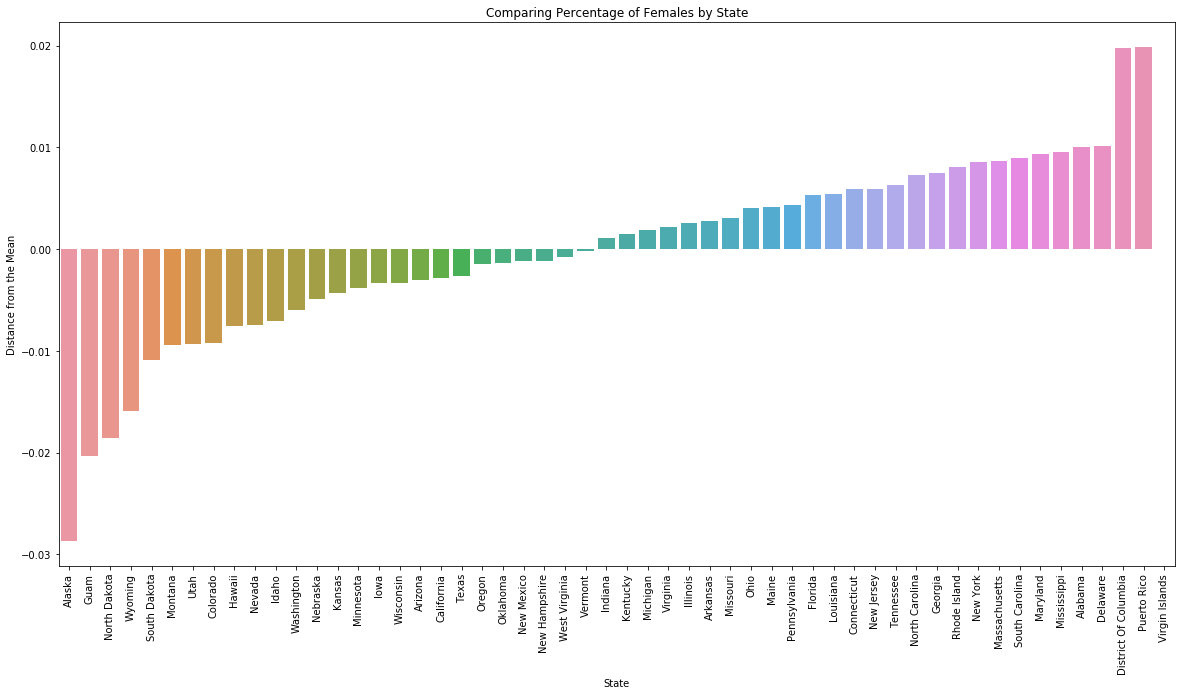

In [199]:
import matplotlib.pyplot as plt

sortData = sortData - (sortData.agg('mean'))

plt.figure(figsize=(20,10)) 
plt.xticks(rotation=90)
plt.title('Comparing Percentage of Females by State')

ax = sns.barplot(x='State', y = 'FemalePercentage2017', data=sortData.reset_index())
ax.set(xlabel='State', ylabel='Distance from the Mean')

We can see here that there is honestly not a huge difference in the female percentage in the different states in the US. The variance is small, and the largest difference from the mean is Alaska, with a percentage less that 0.03 below the mean. Thus, we decided not to pursue this hypothesis further and won't be using it in our model.

In [200]:
#identify 5 most populated states and 5 least populated states
sortTotalPop = sortData.sort_values('PopTotal2017')
highestPopStates = sortTotalPop.index.values[-5:]
lowestPopStates = sortTotalPop.index.values[0:6]
lowHighPopStates = np.concatenate([highestPopStates, lowestPopStates])

In [201]:
changeInCases = timeConfirmedAndPolicies.groupby('State').agg(np.sum)
cols = np.arange(0, 45)
changeInCases = changeInCases.drop(changeInCases.columns[cols], axis=1)
changeInCases = changeInCases.T

In [202]:
#create a dataframe with five most populated states and five least populated states
populationTotal = changeInCases.copy()
populationTotal.drop(populationTotal.columns.difference(lowHighPopStates), 1, inplace=True)

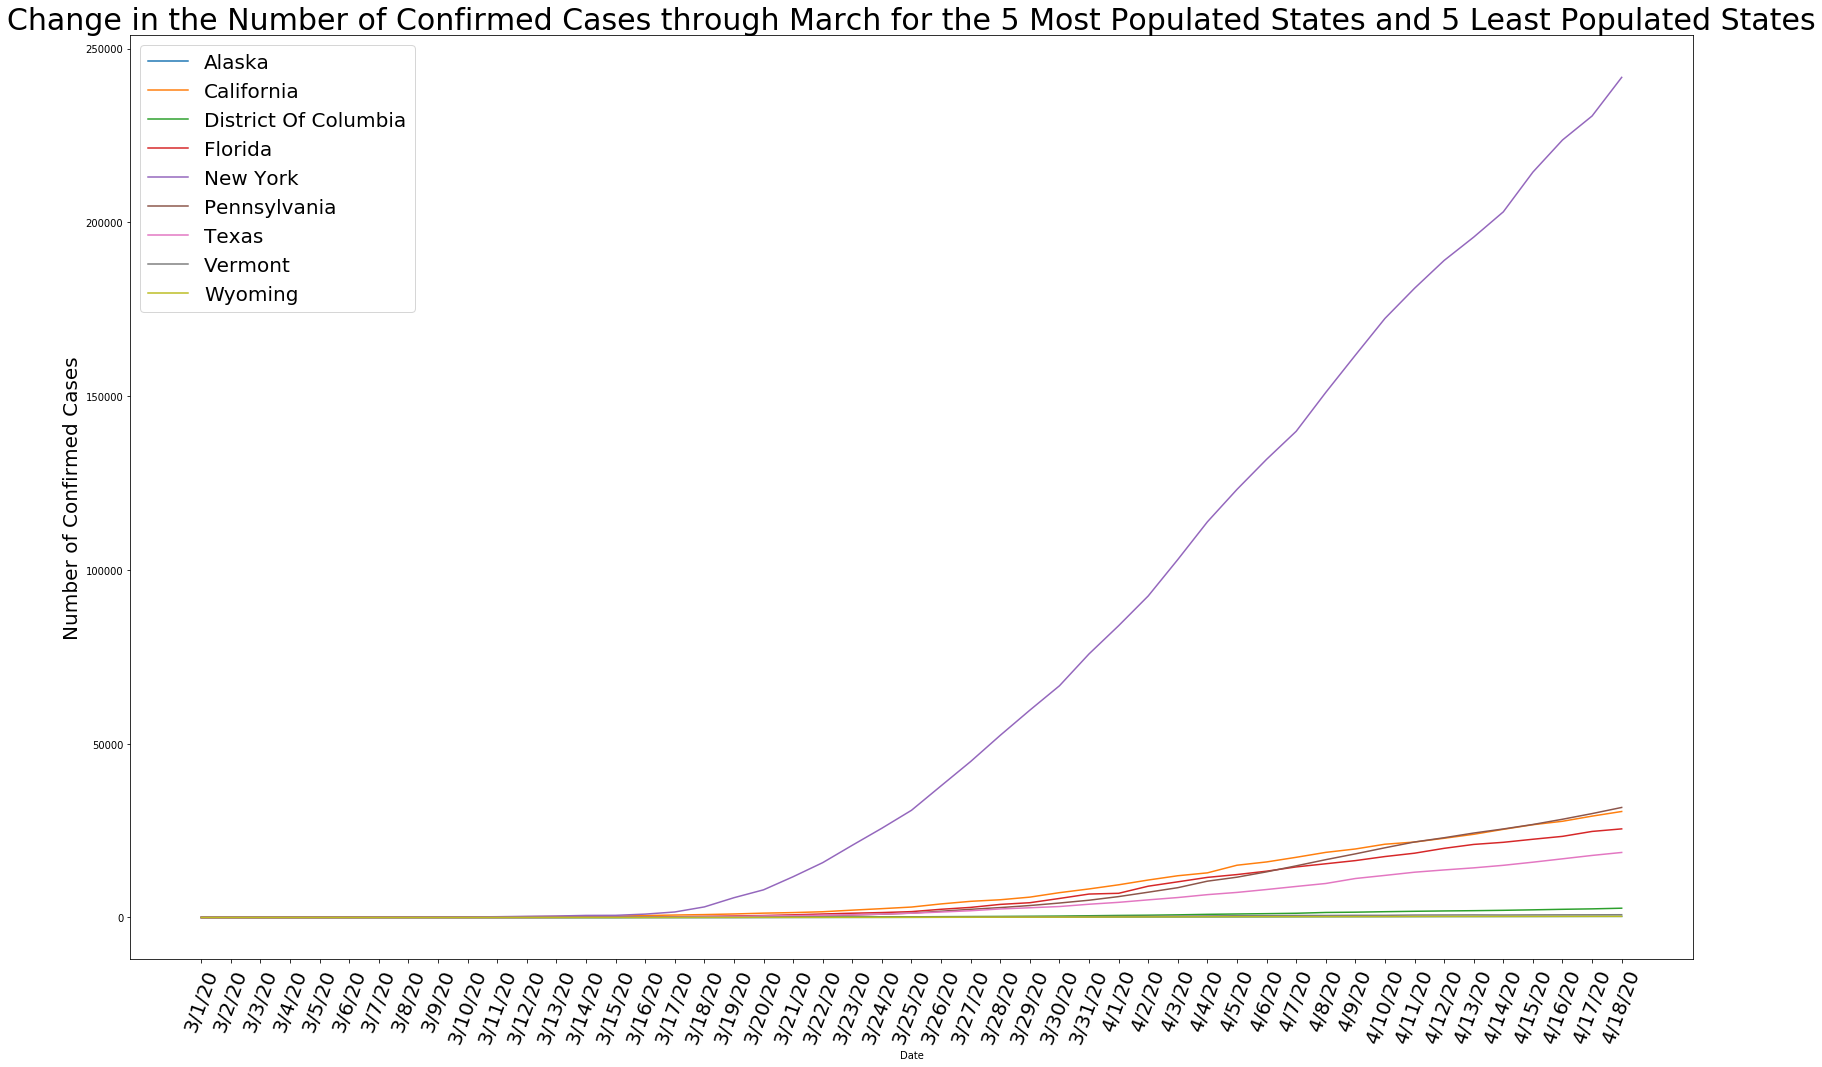

In [203]:
plt.figure(figsize = (28,17))
sns.lineplot(hue=populationTotal.index, data=populationTotal, dashes=False, sort = False)
plt.title("Change in the Number of Confirmed Cases through March for the 5 Most Populated States and 5 Least Populated States", fontsize = 30)
plt.ylabel("Number of Confirmed Cases", fontsize = 20)
plt.xlabel("Date")
plt.xticks(rotation=70, fontsize = 20);
plt.legend(prop={"size":20}, loc='upper left')

The line graph above shows the number of confirmed cases for the 5 most populated states, and the 5 least populated states. The 5 most populated states are: California, Florida, Pennsylvania, New York, and Texas. The 5 least populated states are Alaska, North Dakota, District of Columbia, Vermont, and Wyoming. The lines seem to follow a similar pattern in that the number of confirmed cases increase and decrease at similar dates. However, there seems to be three different levels of extremity in a sense. New York has the highest number of confirmed cases by far, and also the greatest fluctuations. States such as California, Florida, Pennsylvania, and Texas (the other most populated states) have less confirmed cases than New York, but more than the 5 least populated states. This makes sense because the virus is spread through person-to-person contact. One question that arises from looking at this graph is why New York has so many confirmed cases, even compared to the other highly populated states.

In [204]:
#Lineplot for five states with the highest population DENSITY, and 
#five states with the lowest population DENSITY. 
highestDenStates = ['New Jersey', 'Rhode Island', 'Massachusetts', 'Connecticut', 'Maryland']
lowestDenStates = ['Alaska', 'Wyoming', 'Montana', 'North Dakota', 'South Dakota']
lowHighDenStates = np.concatenate([highestDenStates, lowestDenStates])

In [205]:
populationDens = changeInCases.copy()
populationDens.drop(populationDens.columns.difference(lowHighDenStates), 1, inplace=True)

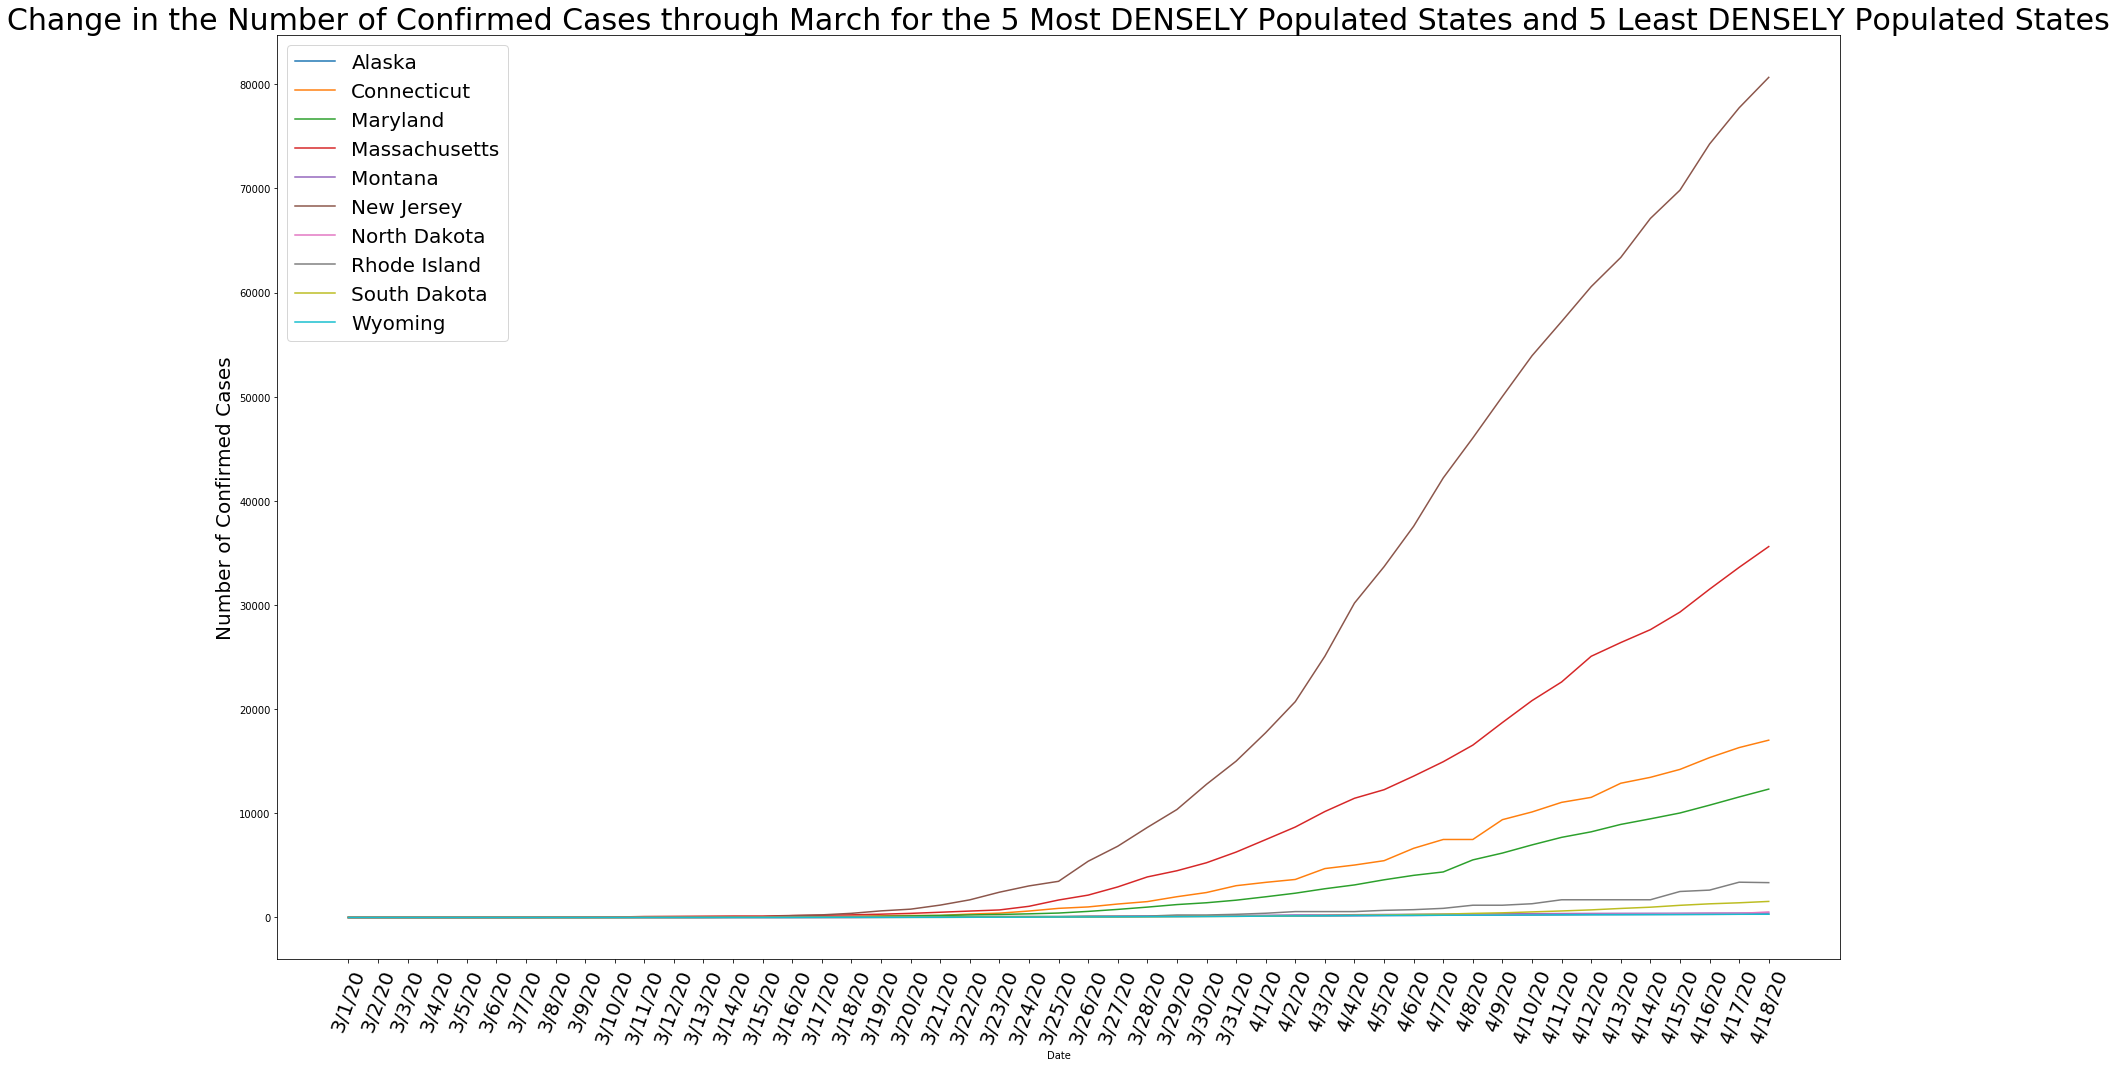

In [206]:
plt.figure(figsize = (28,17))
sns.lineplot(hue=populationDens.index, data=populationDens, dashes=False, sort = False)
plt.title("Change in the Number of Confirmed Cases through March for the 5 Most DENSELY Populated States and 5 Least DENSELY Populated States", fontsize = 30)
plt.ylabel("Number of Confirmed Cases", fontsize = 20)
plt.xlabel("Date")
plt.xticks(rotation=70, fontsize = 20);
plt.legend(prop={"size":20}, loc='upper left')

The line plot above shows the number of confirmed cases for the five most densely populated states and five least densely populated states. The most densely populated states are New Jersey, Rhode Island, Massachusetts, Connecticut, and Maryland. The least populated states include Alaska, Wyoming, Montana, North Dakota, and South Dakota. The states that are most populated are the top five lines in the line graph, meaning at a given date the most densely populated states are likely to have a higher number of confirmed cases compared to the least densely populated states. This would make sense as the virus is spread person through person, so more densely populated states means more people per area, allowing the virus to spread at a quicker rate. However, there are many confounding variables that we need to keep in mind. First, the five most densely populated states are all in similar geographic areas on the east coast of the US, so it is expected they are more similar to eachother, whereas the least densely populated states are more spread out. Rhode Island, even though it is one of the most densely populated states, is actually closer in the number of cases to South Dakota, one of the least densely populated states, than it is to the other most densely populated states.

In [207]:
#Look at when different policies to flatten the curve were 
#implemented in different states.
statePolicy = timeConfirmedAndPolicies.drop_duplicates('State')
statePolicy = statePolicy.iloc[:,0:12].drop(columns=['CountyName', 'countyFIPS'])

In [208]:
psPolicy= statePolicy.groupby('public schools').count()
psPolicy= psPolicy.reset_index()
psPolicy = psPolicy.rename(columns = {'public schools': 'date implemented', 'StateName': 'public school count'})
publicSchoolsDate = psPolicy.iloc[:, 0:2]

In [209]:
sahPolicy = statePolicy.groupby('stay at home').count()
sahPolicy = sahPolicy.reset_index()
sahPolicy = sahPolicy.rename(columns = {'stay at home': 'date implemented', 'StateName': 'stay at home count'})
stayAtHomeDate = sahPolicy.iloc[:, 0:2]

In [210]:
egPolicy = statePolicy.groupby('entertainment/gym').count()
egPolicy = egPolicy.reset_index()
egPolicy = egPolicy.rename(columns = {'entertainment/gym': 'date implemented', 'StateName': 'entertainment/gym count'})
entGymDate = egPolicy.iloc[:, 0:2]

gr50Policy = statePolicy.groupby('>50 gatherings').count()
gr50Policy = gr50Policy.reset_index()
gr50Policy = gr50Policy.rename(columns = {'>50 gatherings': 'date implemented', 'StateName': '>50 gatherings count'})
gr50Date = gr50Policy.iloc[:, 0:2]

gr500Policy = statePolicy.groupby('>500 gatherings').count()
gr500Policy = gr500Policy.reset_index()
gr500Policy = gr500Policy.rename(columns = {'>500 gatherings': 'date implemented', 'StateName': '>500 gatherings count'})
gr500Date = gr500Policy.iloc[:, 0:2]

restPolicy = statePolicy.groupby('restaurant dine-in').count()
restPolicy = restPolicy.reset_index()
restPolicy = restPolicy.rename(columns = {'restaurant dine-in': 'date implemented', 'StateName': 'restaurant dine-in count'})
restDate = restPolicy.iloc[:, 0:2]



datePolicies = publicSchoolsDate.merge(stayAtHomeDate, on = 'date implemented', 
                                 how = 'outer').merge(entGymDate, 
                                            on='date implemented', how = 'outer').merge(gr50Date, on = 'date implemented', how = 'outer').merge(gr500Date, on = 'date implemented', how = 'outer').merge(restDate, on = 'date implemented', how = 'outer')
datePolicies = datePolicies.fillna(0)
datePolicies = datePolicies.sort_values(by='date implemented')

Text(0.5, 1.0, 'Number of States that Implemented Policy at Given Date')

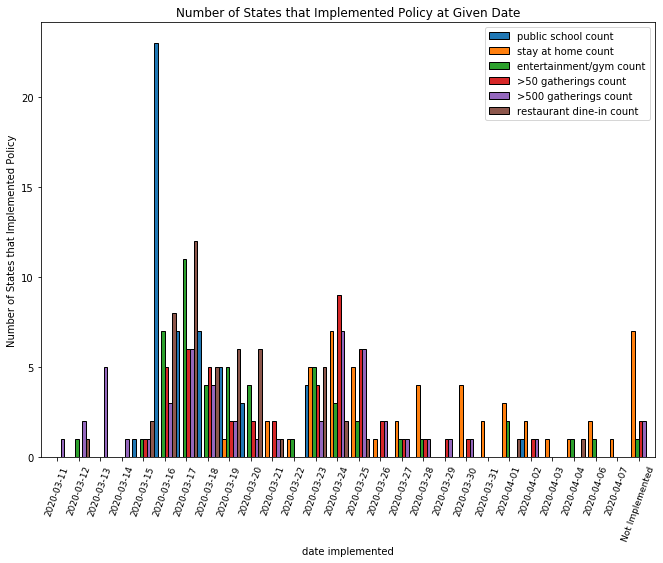

In [211]:
# bar plot that gives an idea of the distribution of dates that policies in different
# states were implemented to help create bins to later categorize the dates.
datePolicies.plot.bar(x= 'date implemented', figsize = (11,8), width = 1, edgecolor = 'black')
plt.xticks(rotation=70, fontsize = 9);
plt.ylabel('Number of States that Implemented Policy')
plt.title('Number of States that Implemented Policy at Given Date')

The figure above shows the number of states that implemented a specific policy for each date. For example, on 3/15/20, over twenty states enacted a policy to shift public schools to online in order to avoid large gatherings. This figure helped us decide 'bins' in which we could categorize a policy as early, middle, late, or never as in not implemented. Early would be 3/11/20-3/22/20, medium would be 3/22/20-3/31/20, and late would be 4/1/20-4/7/20

In [212]:
# function to categorize the date implemented for each policy as 'early', 'medium', 'late'
# or 'not implemented' to help with one hot encoding
def categorize(column):
    early = pd.date_range(start='20200311', end='20200322', freq='D')
    early = early.strftime("%Y-%m-%d")

    medium = pd.date_range(start='20200323', end='20200331', freq='D')
    medium = medium.strftime("%Y-%m-%d")

    late = pd.date_range(start='20200401', end='20200407', freq='D')
    late = late.strftime("%Y-%m-%d")

    earlyCategory = column.apply(lambda i: 'early' if i in early else i)
    medCategory = earlyCategory.apply(lambda i: 'medium' if i in medium else i)
    lateCategory = medCategory.apply(lambda i: 'late' if i in late else i)
    return lateCategory

statePolicyCateg = statePolicy.copy(deep = True)
statePolicyCateg = statePolicyCateg.apply(categorize)
statePolicyCateg.head()

,StateName,State,stay at home,>50 gatherings,>500 gatherings,entertainment/gym,public schools,foreign travel ban,federal guidelines,restaurant dine-in
0,AL,Alabama,late,early,early,medium,early,early,early,early
67,AK,Alaska,medium,medium,medium,early,early,early,early,early
94,AZ,Arizona,medium,early,early,early,early,early,early,early
109,AR,Arkansas,Not Implemented,medium,medium,early,early,early,early,early
184,CA,California,early,early,early,early,early,early,early,early


In [213]:
from sklearn.feature_extraction import DictVectorizer

def ohe_timings(data, columnName):
    """
    One-hot-encodes time.  New columns are of the form Policy_Implemented=TIME
    """
    vec_enc = DictVectorizer()
    vec_enc.fit(data[[columnName]].to_dict(orient='records'))
    stayAtHome_data = vec_enc.transform(data[[columnName]].to_dict(orient='records')).toarray()
    stayAtHome_cats = vec_enc.get_feature_names()
    stayAtHome = pd.DataFrame(stayAtHome_data, columns=stayAtHome_cats)
    data = pd.concat([data, stayAtHome], axis=1)
    return data

In [214]:
#One-hot-encode the different policies implemented to reduce spread of CoV-2
ohePolicies = statePolicyCateg.reset_index()
ohePolicies = ohe_timings(ohePolicies, 'stay at home')
ohePolicies = ohe_timings(ohePolicies, '>50 gatherings')
ohePolicies = ohe_timings(ohePolicies, '>500 gatherings')
ohePolicies = ohe_timings(ohePolicies, 'entertainment/gym')
ohePolicies = ohe_timings(ohePolicies, 'public schools')
ohePolicies = ohe_timings(ohePolicies, 'restaurant dine-in')

ohePolicies = ohePolicies.drop(columns = ['index', 'StateName', 'stay at home', '>50 gatherings', 
                                            '>500 gatherings', 'entertainment/gym', 'public schools', 'restaurant dine-in'])

population2018 = abridged_clean.groupby('State').agg('sum')[['PopulationEstimate2018']]
ohePoliciesAndPop = ohePolicies.join(population2018, how='left', on='State')

In [215]:
#Add number of confirmed cases on 4/18/20 (most recent date) to df to build model
mostRecent = timeConfirmedUS.groupby('Province_State').agg('sum')
mostRecent = mostRecent[['4/18/20']].reset_index()
mostRecent['Province_State'] = mostRecent['Province_State'].replace('District of Columbia', 'District Of Columbia')

modelState = pd.merge(ohePoliciesAndPop, mostRecent, how='left', left_on='State', right_on='Province_State')

modelState = modelState.drop(columns=['State', 'foreign travel ban', 'federal guidelines', 'Province_State'])

#Drop medium to make full rank and avoid perfect multicollinearity 
modelState = modelState[modelState.columns.drop(list(modelState.filter(regex='medium')))]
modelState.head()

,stay at home=Not Implemented,stay at home=early,stay at home=late,>50 gatherings=Not Implemented,>50 gatherings=early,>50 gatherings=late,>500 gatherings=Not Implemented,>500 gatherings=early,>500 gatherings=late,entertainment/gym=Not Implemented,entertainment/gym=early,entertainment/gym=late,public schools=early,public schools=late,restaurant dine-in=early,restaurant dine-in=late,PopulationEstimate2018,4/18/20
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,4887871.0,4712
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,737438.0,314
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,7171646.0,4724
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3013825.0,1744
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,39557045.0,30491


In [216]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm

train, test = train_test_split(modelState, test_size=0.33, random_state=42)

model1 = lm.LinearRegression()
model1.fit(train.drop(columns=['4/18/20']), train['4/18/20'])

model1.predict(train.drop(columns=['4/18/20']))

model1.score(train.drop(columns=['4/18/20']), train['4/18/20'])

0.5650790289119616

In [217]:
model1.score(test.drop(columns=['4/18/20']), test['4/18/20'])

0.07788148049494092

In [218]:
# Want more datapoints so grouping by county instead of state
countyPolicyAndDates = timeConfirmedAndPolicies.drop_duplicates('countyFIPS')
countyPolicyAndDates['countyFIPS'] = countyPolicyAndDates['countyFIPS'].apply(str)
countyPolicyAndDates.loc[countyPolicyAndDates.countyFIPS.str.len()==4, 'countyFIPS'] = '0'+countyPolicyAndDates.loc[countyPolicyAndDates.countyFIPS.str.len()==4, 'countyFIPS']
countyPolicy = countyPolicyAndDates.iloc[:, 0:12]

In [219]:
countyPolicyCateg = countyPolicy.copy(deep = True)
countyPolicyCateg = countyPolicyCateg.apply(categorize)

oheCountyPolicies = countyPolicyCateg.reset_index()
oheCountyPolicies = ohe_timings(oheCountyPolicies, 'stay at home')
oheCountyPolicies = ohe_timings(oheCountyPolicies, '>50 gatherings')
oheCountyPolicies = ohe_timings(oheCountyPolicies, '>500 gatherings')
oheCountyPolicies = ohe_timings(oheCountyPolicies, 'entertainment/gym')
oheCountyPolicies = ohe_timings(oheCountyPolicies, 'public schools')
oheCountyPolicies = ohe_timings(oheCountyPolicies, 'restaurant dine-in')
oheCountyPolicies
oheCountyPolicies = oheCountyPolicies.drop(columns = ['index', 'StateName', 'stay at home', '>50 gatherings', 
                                           '>500 gatherings', 'entertainment/gym', 'public schools', 'restaurant dine-in'])

popCounty = abridged_clean.groupby('countyFIPS').agg('sum')[['PopulationEstimate2018']]

oheCountyPoliciesAndPop = oheCountyPolicies.join(popCounty, how='left', on='countyFIPS')

In [220]:
targetDate = countyPolicyAndDates[['countyFIPS', '4/18/20']]
policyPop = pd.merge(oheCountyPoliciesAndPop, targetDate, how='left', left_on='countyFIPS', right_on='countyFIPS')
modelCounty = policyPop.drop(columns=['State', 'foreign travel ban', 'federal guidelines', 'CountyName', 'countyFIPS'])

#Drop medium to make full rank and avoid perfect multicollinearity 
modelCounty = modelCounty[modelCounty.columns.drop(list(modelCounty.filter(regex='medium')))]
modelCounty.head()

,stay at home=Not Implemented,stay at home=early,stay at home=late,>50 gatherings=Not Implemented,>50 gatherings=early,>50 gatherings=late,>500 gatherings=Not Implemented,>500 gatherings=early,>500 gatherings=late,entertainment/gym=Not Implemented,entertainment/gym=early,entertainment/gym=late,public schools=early,public schools=late,restaurant dine-in=early,restaurant dine-in=late,PopulationEstimate2018,4/18/20
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,55601.0,25.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,218022.0,109.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,24881.0,18.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,22400.0,26.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,57840.0,20.0


In [221]:
#This model looks at counties verses states
train, test = train_test_split(modelCounty, test_size=0.2, random_state=42)

model2 = lm.LinearRegression()
model2.fit(train.drop(columns=['4/18/20']), train['4/18/20'])
model2Fitted = model2.predict(train.drop(columns=['4/18/20']))
model2.score(train.drop(columns=['4/18/20']), train['4/18/20'])

0.0843561872545856

In [222]:
model2.score(test.drop(columns=['4/18/20']), test['4/18/20'])

0.4233854194216914

Text(0.5, 1.0, 'Residual Plot')

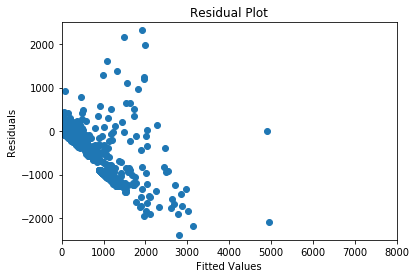

In [223]:
#Make a residual plot for model2
plt.scatter(model2Fitted, train['4/18/20'] - model2Fitted)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.xlim(0, 8000)
plt.ylim(-2500, 2500)
plt.title('Residual Plot')

The residual plot seems to have a pattern where it fans out as the fitted values increase which is not a 'good' residual plot. Also, the fact that the plot does not have similar vertical spread throughout makes it not a 'good' residual plot, indicating a different model may be a better fit for our data.

We can consider including different features to help improve the predictive power of our model.

In [224]:
#Another feature we wanted to look at was the proportion of people 65+ in a county
elderlyProp = pd.DataFrame(data = {'countyFIPS': abridged_clean['countyFIPS'], '65+': abridged_clean['PopulationEstimate65+2017']})
elderlyProp['Total Population'] = abridged_clean['PopulationEstimate2018']
elderlyProp['Proportion 65+'] = elderlyProp['65+'] / elderlyProp['Total Population']

In [225]:
policyPopElderly = pd.merge(policyPop, elderlyProp, how='left', left_on='countyFIPS', right_on='countyFIPS')
regionModel = policyPopElderly
policyPopElderly = policyPopElderly.drop(columns=['65+', 'Total Population', 'State', 'foreign travel ban', 'federal guidelines', 'CountyName', 'countyFIPS'])

In [226]:
#Another feature we wanted to look at was region (Ex. Pacific, East South Central, etc.)
oheRegion = abridged_clean.reset_index()
oheRegion = ohe_timings(oheRegion, 'CensusDivisionName')
oheRegion = oheRegion.drop(columns=['index', 'STATEFP', 'COUNTYFP', 'StateName', 'State', 'CensusRegionName', 'CensusDivisionName'])
oheRegion = oheRegion.iloc[:, [0, 77, 78, 79, 80, 81, 82, 83, 84, 85]]

policyPopElderlyReg = pd.merge(regionModel, oheRegion, how='left', left_on='countyFIPS', right_on='countyFIPS')
policyPopElderlyReg = policyPopElderlyReg.drop(columns=['CountyName', 'State', 'countyFIPS', 'foreign travel ban', 'federal guidelines', 'Total Population', 'Proportion 65+'])

#Drop medium and Pacific to make full rank and avoid perfect multicollinearity 
policyPopElderlyReg = policyPopElderlyReg[policyPopElderlyReg.columns.drop(list(policyPopElderlyReg.filter(regex='medium')))]
policyPopElderlyReg = policyPopElderlyReg.drop(columns = ['CensusDivisionName=Pacific'])
policyPopElderlyReg.head()

,stay at home=Not Implemented,stay at home=early,stay at home=late,>50 gatherings=Not Implemented,>50 gatherings=early,>50 gatherings=late,>500 gatherings=Not Implemented,>500 gatherings=early,>500 gatherings=late,entertainment/gym=Not Implemented,...,4/18/20,65+,CensusDivisionName=East North Central,CensusDivisionName=East South Central,CensusDivisionName=Middle Atlantic,CensusDivisionName=Mountain,CensusDivisionName=New England,CensusDivisionName=South Atlantic,CensusDivisionName=West North Central,CensusDivisionName=West South Central
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,25.0,8392.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,109.0,42413.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,18.0,4757.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,26.0,3632.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,20.0,10351.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [227]:
train, test = train_test_split(policyPopElderlyReg, test_size=0.2, random_state=42)

model3 = lm.LinearRegression()
model3 = model3.fit(train.drop(columns=['4/18/20']), train['4/18/20'])

yHatTrain4 = model3.predict(train.drop(columns=['4/18/20']))

model3.score(train.drop(columns=['4/18/20']), train['4/18/20'])

0.12792237849658572

In [228]:
model3.score(test.drop(columns=['4/18/20']), test['4/18/20'])

0.3102881282904204

In [234]:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
model3OLS=sm.OLS(train['4/18/20'], train.drop(columns=['4/18/20']))
result=model3OLS.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                4/18/20   R-squared (uncentered):                   0.132
Model:                            OLS   Adj. R-squared (uncentered):              0.124
Method:                 Least Squares   F-statistic:                              16.46
Date:                Wed, 13 May 2020   Prob (F-statistic):                    5.30e-61
Time:                        00:06:31   Log-Likelihood:                         -23445.
No. Observations:                2512   AIC:                                  4.694e+04
Df Residuals:                    2489   BIC:                                  4.707e+04
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------

In [230]:
from sklearn import tree
decisionTreeModel = tree.DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = .35)
decisionTreeModel = decisionTreeModel.fit(train.drop(columns = ['4/18/20']), train['4/18/20'])

print(decisionTreeModel.score(train.drop(columns=['4/18/20']), train['4/18/20']))
print(decisionTreeModel.score(test.drop(columns=['4/18/20']), test['4/18/20']))

0.1572452229299363
0.15605095541401273


In [233]:
from sklearn.model_selection import KFold
from sklearn.base import clone

trainList = train.drop(columns=['4/18/20'])
trainy = train['4/18/20']

def rmse(predicted, actual):
    return np.sqrt(np.mean((actual - predicted)**2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

cross_validate_rmse(decisionTreeModel, trainList, trainy)

2130.619768077052

In [232]:
#Cross val scores for the decision tree model and the linear regression model
from sklearn.model_selection import cross_val_score
print(cross_val_score(decisionTreeModel, trainList, trainy, cv = 5))
print(cross_val_score(model3, trainList, trainy, cv = 5))


/srv/conda/envs/data100/lib/python3.7/site-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


[0.15506958 0.15506958 0.14541833 0.15338645 0.1314741 ]
[ 0.3575023  -1.66030789  0.07364468  0.33294753 -0.2406152 ]


Based on our last OLS model and the decision tree model, it seemed like the features of population, proportion of people 65+, policy date implementation, and region are important to predicting the number of confirmed CoV-2 cases. However, even with these features our OLS model has a low score, indicating there are many other factors that need to be accounted for. 